### Choice 1: Load matrix from TAB file

In [1]:
input_mtx = '/usr/local/projects/gEAR/projectr/HuttCtxDevoLMDhs_to_ARKctxDevo3Ksc/HuttCtxDevoLMDhs_DataMTX.tab'
my.data = as.matrix(read.delim(as.is=TRUE,file=input_mtx))
str(my.data)

 chr [1:18122, 1:25] "ENSG00000000003" "ENSG00000000419" "ENSG00000000457" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:25] "dataRowNames" "w13_CP" "w14_1_CP" "w14_2_CP" ...


### Choice 2: Load matrix from H5AD file

In [2]:
library('rhdf5')
src_path = "/usr/local/projects/gEAR/projectr/HuttCtxDevoLMDhs_to_ARKctxDevo3Ksc/8e46cbb5-a762-43b4-a78c-535d9e71a813.h5ad"

h5closeAll()

# To list the structure
#h5ls(src_path)

#Sys.setenv(HDF5_USE_FILE_LOCKING = "FALSE")
#mydata = h5read(src_path, 'X')
#colnames(mydata) = h5read(src_path, 'obs')$index
#rownames(mydata) = h5read(src_path, 'var')$index
#mydata[1:3,1:3]

obsdata = h5read(src_path, 'obs')
#colnames(mydata) = obsdata$index

h5closeAll()

### Do analysis

In [3]:
# This is, for example, a PCA of the Huttner dataset.  It could be stored within
# 'uns' and then applied to others.  For example, we could generate a menu showing that
# PCA and NMF patterns are available from this dataset to be projected onto others
input_pattern = '/usr/local/projects/gEAR/projectr/HuttCtxDevoLMDhs_to_ARKctxDevo3Ksc/HuttCtxDevoLMDhs_ROWmeta_DIMRED_GWCoGAPS_p12.tab'
CTXload = as.matrix(read.delim(as.is=TRUE, file=input_pattern))
str(CTXload)

 chr [1:18122, 1:13] "ENSG00000156453" "ENSG00000185238" "ENSG00000254501" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:13] "dataRowNames" "p1" "p2" "p3" ...


In [4]:
# ENSGids need to be rownames, currently they are the first column
rnmsData=my.data[,1]
my.data = my.data[,-1]

rnmsLoad=CTXload[,1]
CTXload =  CTXload[,-1]

sum( rnmsData %in% rnmsLoad )

my.data=matrix(data=as.numeric(my.data),nrow=dim(my.data)[1],ncol=dim(my.data)[2])
CTXload=matrix(data=as.numeric(CTXload),nrow=dim(CTXload)[1],ncol=dim(CTXload)[2])

rownames( my.data ) = rnmsData
rownames( CTXload )=  rnmsLoad

[1] 18122

In [5]:
# Do the indexes match?
sum( rownames( my.data ) %in% rownames( CTXload ) )

[1] 18122

In [6]:
library(projectR)
my.proj = projectR(data=my.data, loadings = CTXload, full = FALSE)

[1] "18122 row names matched between data and loadings"
[1] "Updated dimension of data: 18122 24"


'data.frame':	24 obs. of  43 variables:
 $ dataColNames           : chr  "w13_CP" "w14_1_CP" "w14_2_CP" "w15_CP" ...
 $ title                  : chr  "Human CP1" "Human CP2" "Human CP3" "Human CP4" ...
 $ geo_accession          : chr  "GSM949822" "GSM949823" "GSM949824" "GSM949825" ...
 $ status                 : chr  "Public on Jul 03 2012" "Public on Jul 03 2012" "Public on Jul 03 2012" "Public on Jul 03 2012" ...
 $ submission_date        : chr  "Jun 19 2012" "Jun 19 2012" "Jun 19 2012" "Jun 19 2012" ...
 $ last_update_date       : chr  "May 23 2013" "May 23 2013" "May 23 2013" "May 23 2013" ...
 $ type                   : chr  "SRA" "SRA" "SRA" "SRA" ...
 $ channel_count          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ source_name_ch1        : chr  "Fetal human neocortex" "Fetal human neocortex" "Fetal human neocortex" "Fetal human neocortex" ...
 $ organism_ch1           : chr  "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens" ...
 $ characteristics_ch1    : chr  "tissue: Neoc

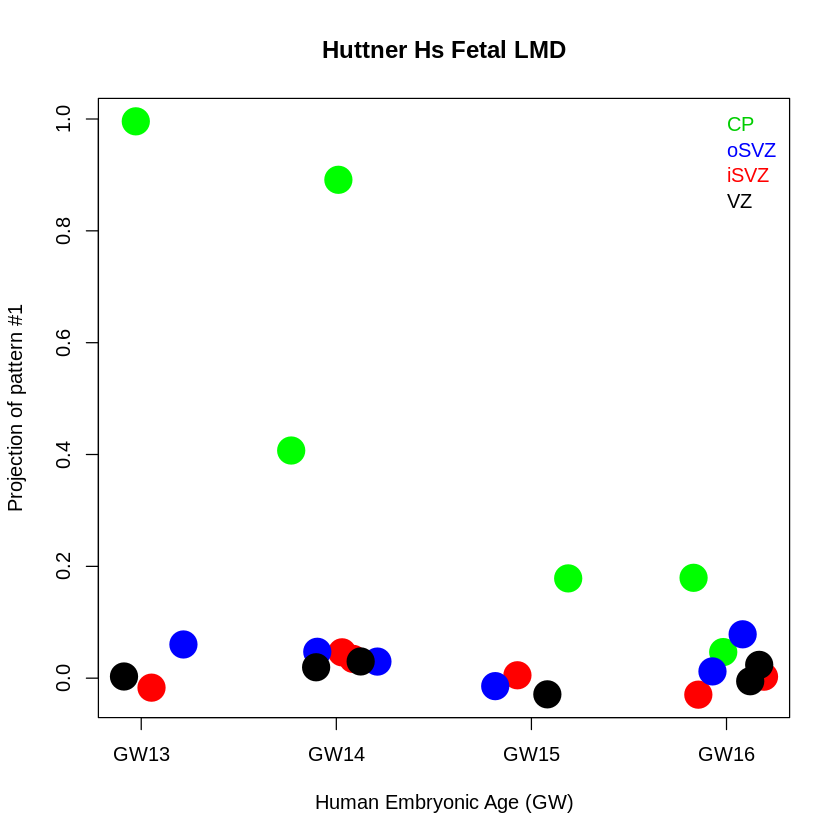

In [7]:
# Get the obs data of the target of the projection, switch to h5
colmeta_path = '/usr/local/projects/gEAR/projectr/HuttCtxDevoLMDhs_to_ARKctxDevo3Ksc/HuttCtxDevoLMDhs_COLmeta.tab'
colmeta = read.delim(as.is=TRUE, file=colmeta_path)
str(colmeta)
# Here we will actually rely on the NeMO displays to define the curations
colmeta$AgeGWj=jitter(colmeta$AgeGW,amount=0.25)

rowN=1# lets look at pattern 1 projection

# product will be a matrix like an expression matrix but the row indexes are PC#
# or pattern# in the case of NMF
plot(x=colmeta$AgeGWj,y=my.proj[rowN,],xaxt="n",main="Huttner Hs Fetal LMD",cex=3,col=colmeta$Color,pch=19,xlab="Human Embryonic Age (GW)",ylab=paste("Projection of pattern #",rowN,sep=""))
legend(x="topright",legend=c("CP","oSVZ","iSVZ","VZ"),text.col=c(3,4,2,1),bty="n")
axis(side=1,at=c(13:16),labels=c("GW13","GW14","GW15","GW16"))
